## Foot Locker Data Analyst Questions - Business Optimization

**Candidate Name:** Daniel Jurado

**Date Completed:** 2/6/2020

----

## Question 1

**Question 1a:**



In [ ]:
# I am assuming 'sales' is per each 'unit' and NOT total sales of all units.

SELECT
	store_id,
	SUM(sales)*SUM(units) as Total_Sales,
	SUM(units) as Total_Units,
	SUM(sales)*SUM(units) - SUM(cogs)*SUM(units) as Total_Profit
FROM
	Order_Detail
GROUP BY store_id
ORDER BY Total_Profit DESC


**Question 1b:**





In [ ]:
SELECT
	store_id,
	product,
	SUM(sales)*SUM(units) as Total_Sales,
	SUM(units) as Total_Units,
	SUM(sales)*SUM(units) - SUM(cogs)*SUM(units) as Total_Profit
FROM
	Order_Detail
GROUP BY store_id, product
ORDER BY store_id ASC


**Question 1c:**



In [ ]:
SELECT
	time_stamp,
	store_id,
	product,
	SUM(sales)*SUM(units) as Total_Sales,
	SUM(units) as Total_Units,
	SUM(sales)*SUM(units) - SUM(cogs)*SUM(units) as Total_Profit
FROM
	Order_Detail
GROUP BY store_id, product, time_stamp
ORDER BY time_stamp, store_id ASC


**Question 1d:**



In [ ]:
# Jan 3, 2017 is the first Tuesday of the year.

SELECT
	(orders.time_stamp - DATE('2017-01-03'))/7 as Week_Number,
	orders.store_id,
	products.cat_name,
	SUM(orders.sales)*SUM(units) as Total_Sales,
	SUM(orders.units) as Total_Units,
	SUM(orders.sales)*SUM(orders.units) - SUM(orders.cogs)*SUM(orders.units) as Total_Profit
FROM
	Order_Detail orders
LEFT JOIN
	Product_Detail products
ON
	orders.product = products.product
GROUP BY 
    orders.store_id, products.cat_name, Week_Number
ORDER BY 
    Week_Number, store_id ASC


**Question 1e:**

Haha, you got me with this one. Some Observations:

- There is a key_interval with a value of 00000000. However no Documentation exisits.

- I also Left join to see if any of the tables didnt match up.

- There are duplicate '10000001' invoice IDs. However as the documentation states 'multiple items can be purchased with each invoice' so that is not an issue.

- Each invoice_id has a unique invoice_line although those numbers do not flow in order as the invoice_id does.

- All variables are casted correctly

## Question 2
Question 1 Disclaimer: The required output for this question is the correct SQL code and query results as a markdown table, you may use any dialect of SQL you wish, but submissions in any other language will be considered incorrect.

Thus I will be using python for this question.

In [1]:
# Import pandas library 
import pandas as pd 

In [2]:
# Create table for Product Attributes
attributes = {'product':[100,101,102], 'tags':['shoes, hats','shoes, socks','accessories']} 
  
# Create the pandas DataFrame 
attributes = pd.DataFrame(attributes) 
  
# print dataframe. 
attributes

,product,tags
0,100,"shoes, hats"
1,101,"shoes, socks"
2,102,accessories


In [3]:
# Create table for Purchase History
history = {'customer':['A','A','B','C','C','B','A','C'], 'product':[100,101,101,100,102,101,100,102]} 
  
# Create the pandas DataFrame 
history = pd.DataFrame(history) 
  
# print dataframe. 
history

,customer,product
0,A,100
1,A,101
2,B,101
3,C,100
4,C,102
5,B,101
6,A,100
7,C,102


**Question 2a.1:**


I assume that ***history*** and ***attributes*** are dfs that were given to me. Also my code will be written in a way which will be adaptable to whatever data is added thus removing the need for manual column creation.

In [4]:
# Create list of all tags
tags = []
for i in list(attributes['tags'].unique()):
    tags+=i.split()

# Strip commas from tags
tags = [x.replace(',', '') for x in tags]

# Return unique values only
tags = list(set(tags))
tags

['socks', 'accessories', 'shoes', 'hats']

In [5]:
# Add binary columns to show tag contents
attributes[tags] = pd.concat([attributes['tags'].str.contains(x) for x in tags], 1, keys=tags).astype(int)
attributes

,product,tags,socks,accessories,shoes,hats
0,100,"shoes, hats",0,0,1,1
1,101,"shoes, socks",1,0,1,0
2,102,accessories,0,1,0,0


In [6]:
# Combine Attributes and History Tables
agg = pd.merge(history, attributes, on="product")

# Aggregate all values by Customer
tags.insert(0, 'customer')
agg[tags].groupby('customer').sum()

,socks,accessories,shoes,hats
customer,,,,
A,1,0,3,2
B,2,0,2,0
C,0,2,1,1


**Question 2a.2:**


    "First make it work. Then make it right. Then make it fast." ~ Kent Beck

In full transparency I do not have much experience with deploying code but in a nutshell I would treat code like an A/B test and profile each script on CPU and Execution time. This process would be countinuously iterative and comparative until I derive the most optimal script.


**Question 2b:**



    I would replicate code via PySpark

**Question 3a:**


In [7]:
# Create table for Hypothesis Test
hypo = {'Image':['A','B','C','D'], 
              'Visitor':[21, 180, 250, 100], 
              'Purchases':[3, 30, 50, 15]} 
  
# Create the pandas DataFrame 
hypo = pd.DataFrame(hypo) 
  
# print dataframe. 
hypo

,Image,Visitor,Purchases
0,A,21,3
1,B,180,30
2,C,250,50
3,D,100,15


In [8]:
# Add conversion column
hypo['Conversions'] = hypo['Purchases'] / hypo['Visitor']

# Add percent of total sales column
hypo['Perc. Total Purchases'] = hypo['Purchases'] / hypo['Purchases'].sum()
hypo

,Image,Visitor,Purchases,Conversions,Perc. Total Purchases
0,A,21,3,0.142857,0.030612
1,B,180,30,0.166667,0.306122
2,C,250,50,0.200000,0.510204
3,D,100,15,0.150000,0.153061


If I HAVE to pick just one solely on this information, then Image C would be winner based solely on conversion and percent make up of total purchases.

However, there are alot of things to consider:

    - What were the values of the purchases? Image C could have led to smaller basket size and less in total sales compared to Image B for all we know.

    - In addition, I would love to know what Type of customer did we just acquire. Are they a one-and-done purchase or are they are strong repeat customer? For all we know Image C customers just made one purchase and never came back within three years while Image A customers each made 300 purchases each during the same time frame! Customer Lifetime Value is very valuable in answering such a question.

    - Just like in marketing mix I would not simply abandon a bunch of different under-performing channels in favor for just one. If anything this might justify the redistribution of funds to each image proportionally to the amount of Value each one generates. Stick with your winners, try and develop your losers.

    - Last thing, we would need to take into consideration samples-size. Why are Image A vistors so low? Where all images displayed for the same amount of time or is Image A new? However, with such a small number of visitors it would be hard to take Image A seriously.


**Question 3b:**



Just based on the information given, the only thing that really changes for me is that now Image A has a sufficient sample size to take it seriously.

For the most part my answer is the same as 3a given other information which would be need to make this analysis "Actionable".


### **Question Four: Forecasting**

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('webtraffic.csv')

### Inspect the data, create a DatetimeIndex

In [3]:
df.head()

,date,sessions
0,1/1/17,88215
1,1/2/17,88484
2,1/3/17,87877
3,1/4/17,86780
4,1/5/17,84622


In [4]:
# Check Columns and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
date        100 non-null object
sessions    100 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [5]:
# Add a "date" datetime column via pd.to_datetime(dict())
df['date'] = pd.to_datetime(df['date'])

In [6]:
# Set "date" to be the index
df.set_index('date',inplace=True)
df.index.freq = 'D'
df.head()

,sessions
date,
2017-01-01,88215
2017-01-02,88484
2017-01-03,87877
2017-01-04,86780
2017-01-05,84622


### Plot the source data

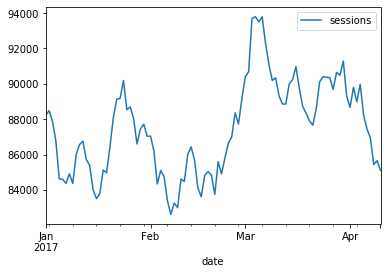

In [7]:
df.plot()

I am not seeing any indication of seasonality and trend in this plot. In all honesty I am not to confident given this distribution being only over 100 days.

Let's take a closer look via ETS Decomposition

### Run an ETS Decomposition

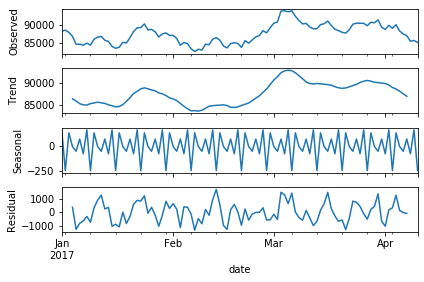

In [8]:
# ETS 
result = seasonal_decompose(df['sessions'], model='add')
result.plot();

There seams to be some sort of season effect present however due to its seasonal range of -250 to ~100 in comparison to the Session range of 82,000 to 94,000, we can assume that seasonality has no effect.

### Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot more combinations to evaluate.

In [10]:
# For SARIMA Orders we set seasonal=True and pass in an m value
auto_arima(df['sessions'],seasonal=False,m=100).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -814.165
Date:                Thu, 06 Feb 2020   AIC                           1640.331
Time:                        19:21:54   BIC                           1655.901
Sample:                             0   HQIC                          1646.630
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.4120     37.038      0.119      0.905     -68.181      77.005
ar.L1          1.6315      0.019     85.430      0.000       1.594       1.669
ar.L2         -0.9840      0.019    -52.900      0.000      -1.020      -0.948
ma.L1         -1.6365      0.028    -58.170      0.000      -1.692      -1.581
ma.L2          0.9793      0.026     37.969      0.000       0.929       1.030
sigma2      9.581e+05      0.001   1.46e+09      0.000    9.58e+05    9.58e+05
===================================================================================
Ljung-Box (Q):                       35.53   Jarque-Bera (JB):                 1.12
Prob(Q):                              0.67   Prob(JB):                         0.57
Heteroskedasticity (H):               1.05   Skew:                             0.17
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.84e+25. Standard errors may be unstable.
"""

Excellent! This provides an SARIMAX of order(2, 1, 2) without a seasonal component as we saw in the ETS Decomposition Now let's train & test the SARIMAX(2,1,2) model, evaluate it, then produce a forecast of future values.
### Split the data into train/test sets

In [11]:
# Many Months of time do we have
len(df)

100

In [12]:
# Set 80 days for Train, 20 Days for Testing
train = df.iloc[:80]
test = df.iloc[80:]

### Fit a SARIMAX(2,1,2) Model

In [13]:
# Build and fit model on Train set
model = SARIMAX(train['sessions'],order=(2,1,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:               sessions   No. Observations:                   80
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -648.613
Date:                Thu, 06 Feb 2020   AIC                           1307.226
Time:                        19:22:05   BIC                           1319.073
Sample:                    01-01-2017   HQIC                          1311.972
                         - 03-21-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6356      0.026     63.179      0.000       1.585       1.686
ar.L2         -0.9852      0.023    -42.690      0.000      -1.030      -0.940
ma.L1         -1.6423      0.038    -42.739      0.000      -1.718      -1.567
ma.L2          0.9821      0.034     28.797      0.000       0.915       1.049
sigma2      9.393e+05   1.53e-09   6.16e+14      0.000    9.39e+05    9.39e+05
===================================================================================
Ljung-Box (Q):                       37.79   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.57   Prob(JB):                         0.42
Heteroskedasticity (H):               1.66   Skew:                             0.31
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.69e+31. Standard errors may be unstable.
"""

In [15]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, 
                              end=end, 
                              dynamic=False, 
                              typ='levels').rename('SARIMA(2,1,2) Predictions')

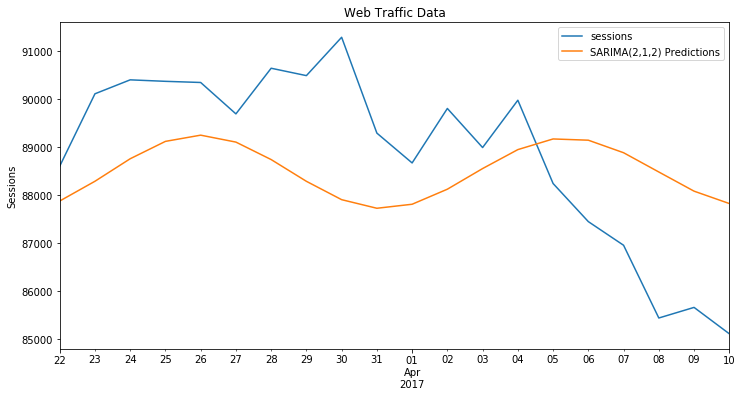

In [16]:
# Plot predictions against known values
title = 'Web Traffic Data'
ylabel='Sessions'
xlabel=''

# Format Plot
ax = test['sessions'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

Although we not directly on the money, our model seems to follow the general trend well enough. Also given the distance between the lines, it doesn't see to bad when you consider the actual range in which we are evaluating.

What I do find concerning however is the the divergengce of both lines at the ends of the plots.

### Evaluate the Model

In [17]:
# Calculate MSE vs RMSE
from statsmodels.tools.eval_measures import mse,rmse
error1 = mse(test['sessions'], predictions)
error2 = rmse(test['sessions'], predictions)

# Return MSE, RMSE on Test Set vs Predictions
print(f'SARIMA(2,1,2) MSE Error: {error1:11.10}')
print(f'SARIMA(2,1,2) RMSE Error: {error2:11.10}')

SARIMA(2,1,2) MSE Error: 3346640.776
SARIMA(2,1,2) RMSE Error: 1829.382621


In [18]:
# Mean of Test Data
print(f"Mean:     {test['sessions'].mean()}")
print(f"Std. Dev: {test['sessions'].std()}")

Mean:     88874.7
Std. Dev: 1855.739151928417


These are outstanding results! RMSE is minimal in comparison to the population. However, let's see what we can predict 60 days out. 

### Retrain the model on the full data, and forecast into unknown future

In [19]:
# Build and fit model on complete dataset
model = SARIMAX(df['sessions'],order=(2,1,2))
results = model.fit()

In [20]:
# Forecast Values
fcast = results.predict(len(df),len(df)+60,typ='levels').rename('SARIMAX(2,1,2) Forecast')

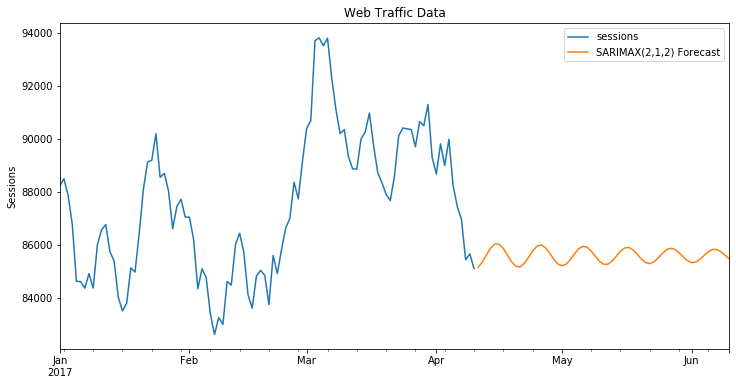

In [22]:
# Plot predictions against known values
title = 'Web Traffic Data'
ylabel='Sessions'
xlabel=''

ax = df['sessions'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Conclusion

Unfortunately a SARIMAX(2,1,2) model with such an oscillating prediction I am not at all confident with theses results. Given this data's distribution and fluctuation over time, and the limited window of observation, I do not feel that any model can capture this and properly forecast.

I do I really wish I had more data to create a more robust model; atleast two years worth given the behavior. 

**In Addition to my Original Answer:**
- The most simple answer would be to fit a straight line, and perhaps we might be better off with a mean.
- ARIMA only perfroms well when the data is directly related to the time stamp. For all we know this TS is being affected by many outside factors beyond our understanding. Much of this information informing price won't be available with just the time stamped information.